In [165]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [166]:
data = pd.read_csv('C:/Users/ADMIN/Desktop/인공지능/baseball_players.csv')

In [167]:
data

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


In [168]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    data[i]=le.fit_transform(data[i])

In [169]:
data.isna().sum()

Name              0
Team              0
Position          0
Height(inches)    0
Weight(pounds)    0
Age               0
dtype: int64

In [170]:
#data = data.dropna(axis = 1)

In [171]:
data

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,12,3,0,7,15,35
1,794,3,0,7,50,625
2,817,3,0,5,45,482
3,628,3,2,5,45,645
4,199,3,2,6,23,653
...,...,...,...,...,...,...
1029,105,25,4,6,25,145
1030,997,25,4,7,15,190
1031,202,25,4,8,40,153
1032,824,25,4,8,25,496


In [172]:
data=data.drop('Name',axis=1)
data=data.drop('Team',axis=1)

In [173]:
data

,Position,Height(inches),Weight(pounds),Age
0,0,7,15,35
1,0,7,50,625
2,0,5,45,482
3,2,5,45,645
4,2,6,23,653
...,...,...,...,...
1029,4,6,25,145
1030,4,7,15,190
1031,4,8,40,153
1032,4,8,25,496


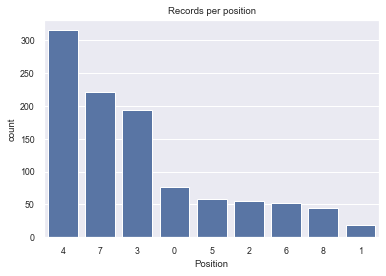

In [174]:
sns.countplot(x = "Position", data = data, palette = [sns.color_palette()[0]],
              order = data.Position.value_counts().index)
plt.title("Records per position");

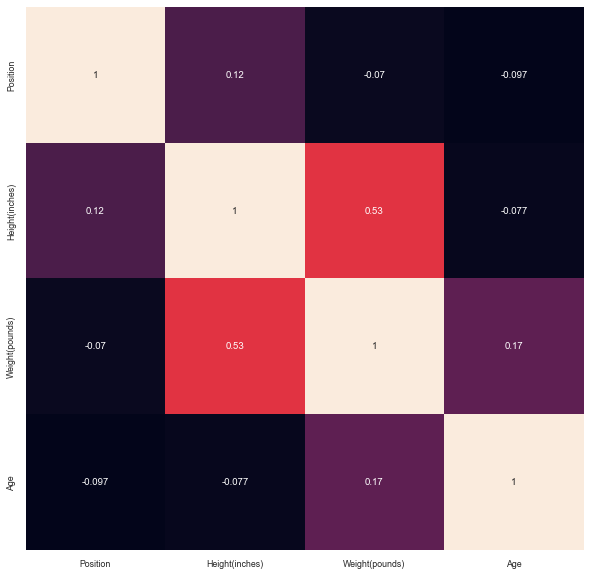

In [175]:
#상관 관계 행렬
data_corr=data.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cbar=False)
plt.show()

In [176]:
#Set x and y values
y=data.Position.values
x=data.drop('Position',axis=1)

In [177]:
# train/test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [178]:
# train/test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [179]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeRegressor

clf_dt = DecisionTreeRegressor()
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print(clf_dt.score(X_train, y_train))

0.9986628223212628


In [180]:
mse = np.sqrt(mean_squared_error(pred_dt, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.984662888901605


In [181]:
from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor()
rf_clf.fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)

print(rf_clf.score(X_train, y_train))

0.8450942692756358


In [182]:
mse = np.sqrt(mean_squared_error(pred_rf, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.2491892833269853


In [183]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print(clf_lr.score(X_train, y_train))

0.30350665054413545


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [184]:
mse = np.sqrt(mean_squared_error(pred_lr, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.171399513081512


In [185]:
from sklearn.svm import SVR

clf_svm = SVR()
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print(clf_svm.score(X_train, y_train),clf_svm.score(X_test, y_test))

-0.011207928075265494 -0.014025156044194853


In [186]:
mse = np.sqrt(mean_squared_error(pred_svm, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.1159835627431054
